In [4]:
import pandas as pd

In [1]:
#mounting google drive in colab to access and save files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv("/content/drive/MyDrive/Course work/Solar Power Plant Data.csv")

In [6]:
data = data.map(lambda x: x.strip() if isinstance(x, str) else x)

In [7]:
print("Dataset Preview:")
print(data.head())

Dataset Preview:
     Date-Hour(NMT)  WindSpeed  Sunshine  AirPressure  Radiation  \
0  01.01.2017-00:00        0.6         0       1003.8       -7.4   
1  01.01.2017-01:00        1.7         0       1003.5       -7.4   
2  01.01.2017-02:00        0.6         0       1003.4       -6.7   
3  01.01.2017-03:00        2.4         0       1003.3       -7.2   
4  01.01.2017-04:00        4.0         0       1003.1       -6.3   

   AirTemperature  RelativeAirHumidity  SystemProduction  
0             0.1                   97               0.0  
1            -0.2                   98               0.0  
2            -1.2                   99               0.0  
3            -1.3                   99               0.0  
4             3.6                   67               0.0  


In [8]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date-Hour(NMT)       8760 non-null   object 
 1   WindSpeed            8760 non-null   float64
 2   Sunshine             8760 non-null   int64  
 3   AirPressure          8760 non-null   float64
 4   Radiation            8760 non-null   float64
 5   AirTemperature       8760 non-null   float64
 6   RelativeAirHumidity  8760 non-null   int64  
 7   SystemProduction     8760 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 547.6+ KB
None


In [9]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Date-Hour(NMT)         0
WindSpeed              0
Sunshine               0
AirPressure            0
Radiation              0
AirTemperature         0
RelativeAirHumidity    0
SystemProduction       0
dtype: int64


In [12]:
import pandas as pd

# Load the data
data = pd.read_csv("/content/drive/MyDrive/Course work/Solar Power Plant Data.csv")

# Convert 'Date-Hour(NMT)' to datetime objects
data['Date-Hour(NMT)'] = pd.to_datetime(data['Date-Hour(NMT)'], format='%d.%m.%Y-%H:%M')

# Extract the hour of the day
data['Hour'] = data['Date-Hour(NMT)'].dt.hour

# Calculate the mean 'SystemProduction' for each hour
mean_target = data.groupby("Hour")["SystemProduction"].mean()

# Map the mean values back to the DataFrame
data["Hour"] = data["Hour"].map(mean_target)

# Calculate the correlation
correlation = data["Hour"].corr(data["SystemProduction"])
print(f"Correlation between transformed 'Hour' and SystemProduction: {correlation:.3f}")


Correlation between transformed 'Hour' and SystemProduction: 0.559


In [13]:
data.fillna(data.median(), inplace=True)
print("Missing values filled using median!")

Missing values filled using median!


In [14]:
print(data.isnull().sum())

Date-Hour(NMT)         0
WindSpeed              0
Sunshine               0
AirPressure            0
Radiation              0
AirTemperature         0
RelativeAirHumidity    0
SystemProduction       0
Hour                   0
dtype: int64


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Load the data
file_path = "/content/drive/MyDrive/Course work/Solar Power Plant Data.csv"
data = pd.read_csv(file_path)

# Convert 'Date-Hour(NMT)' to datetime objects
data['Date-Hour(NMT)'] = pd.to_datetime(data['Date-Hour(NMT)'], format='%d.%m.%Y-%H:%M')

# Extract the hour of the day
data['Hour'] = data['Date-Hour(NMT)'].dt.hour

# Define bins for Radiation (adjust as needed)
radiation_bins = [-10, 0, 25, 50, 75, 150, data['Radiation'].max()]  # Adjust the bin edges
radiation_labels = ['Very Low', 'Low', 'Moderate', 'Medium', 'High', 'Very High']

# Bin the 'Radiation' column into categories
data['Radiation_Category'] = pd.cut(data['Radiation'], bins=radiation_bins, labels=radiation_labels)

# One-hot encode categorical features
data = pd.get_dummies(data, columns=['Radiation_Category'], drop_first=True)

# Define features (X) and target (y)
X = data.drop(['Date-Hour(NMT)', 'SystemProduction'], axis=1)  # Include other relevant features
y = data['SystemProduction']

# Identify any columns with NaN values
nan_cols = X.columns[X.isnull().any()].tolist()
print(f"Columns with NaN values: {nan_cols}")

# Impute missing values using the mean strategy
if nan_cols:  # Check if there are columns with NaN values
    imputer = SimpleImputer(strategy='mean')
    X[nan_cols] = imputer.fit_transform(X[nan_cols])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the coefficients
print(f"Model Coefficients: {model.coef_}")


Columns with NaN values: []
Mean Squared Error: 754337.856325656
Model Coefficients: [  20.32129117 -234.48452757  -62.11391999 1134.79376201   71.12757946
 -153.42851569  101.06403669   -9.37871371   -2.92492458   17.63519102
   31.93845564  103.02981809]


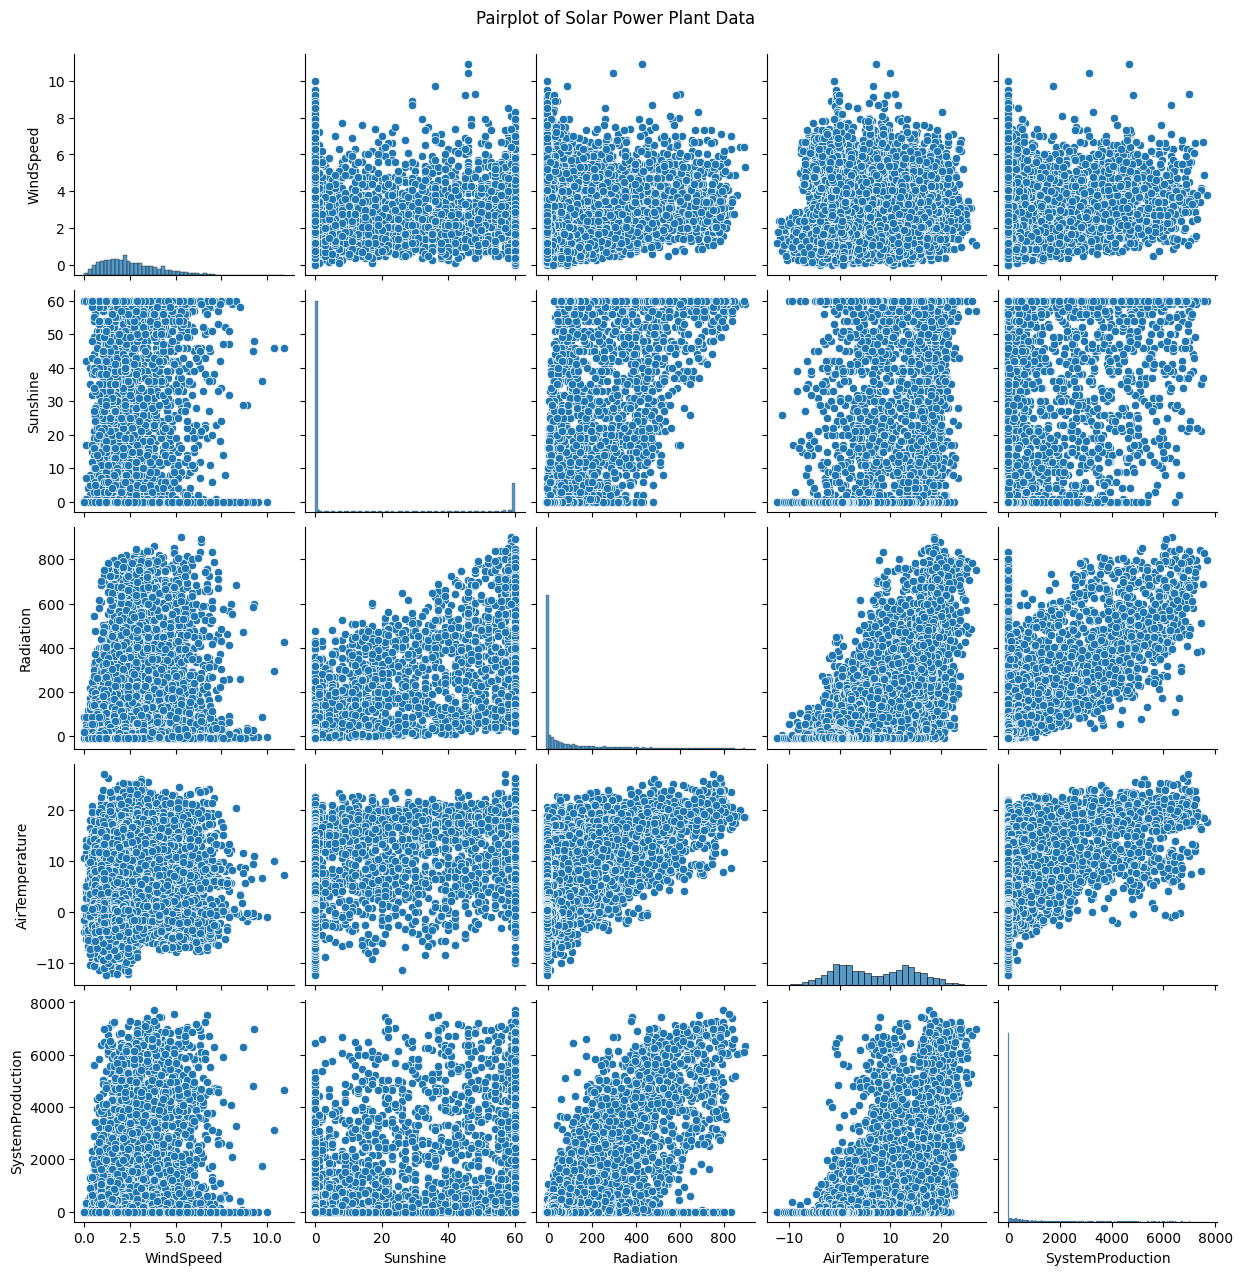

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = "/content/drive/MyDrive/Course work/Solar Power Plant Data.csv"
data = pd.read_csv(file_path)

# Convert 'Date-Hour(NMT)' to datetime objects
data['Date-Hour(NMT)'] = pd.to_datetime(data['Date-Hour(NMT)'], format='%d.%m.%Y-%H:%M')

# Select relevant columns for the pairplot
# Adjust this list based on what relationships you want to explore
columns_for_pairplot = ["WindSpeed", "Sunshine", "Radiation", "AirTemperature", "SystemProduction"]

# Handle missing values
data = data[columns_for_pairplot].dropna()

# Create the pairplot
sns.pairplot(data[columns_for_pairplot])
plt.suptitle("Pairplot of Solar Power Plant Data", y=1.02)  # Add a title
plt.show()


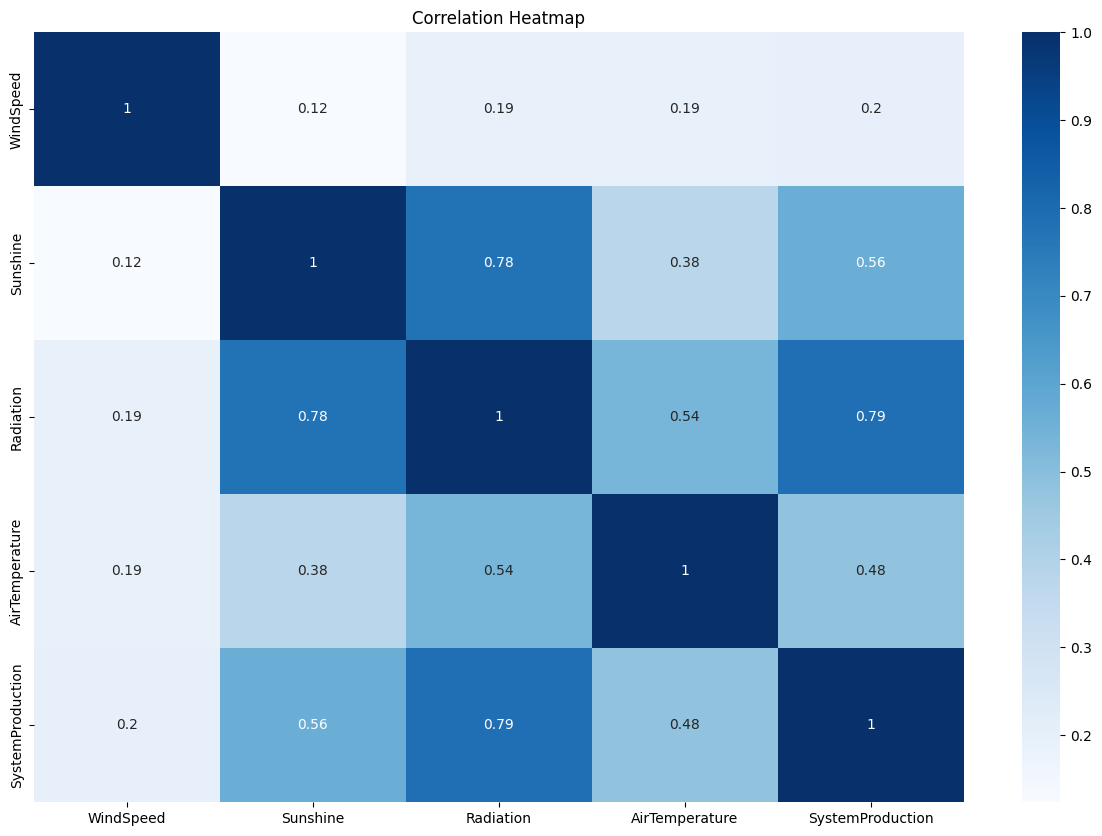

In [22]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Load the data
file_path = "/content/drive/MyDrive/Course work/Solar Power Plant Data.csv"
data = pd.read_csv(file_path)

# Convert 'Date-Hour(NMT)' to datetime objects
data['Date-Hour(NMT)'] = pd.to_datetime(data['Date-Hour(NMT)'], format='%d.%m.%Y-%H:%M')

# Extract the hour of the day
data['Hour'] = data['Date-Hour(NMT)'].dt.hour

# Define bins for Radiation (adjust as needed)
radiation_bins = [-10, 0, 25, 50, 75, 150, data['Radiation'].max()]  # Adjust the bin edges
radiation_labels = ['Very Low', 'Low', 'Moderate', 'Medium', 'High', 'Very High']

# Bin the 'Radiation' column into categories
data['Radiation_Category'] = pd.cut(data['Radiation'], bins=radiation_bins, labels=radiation_labels)

# One-hot encode categorical features
data = pd.get_dummies(data, columns=['Radiation_Category'], drop_first=True)

# Define features (X) and target (y)
X = data.drop(['Date-Hour(NMT)', 'SystemProduction'], axis=1)  # Drop relevant column
y = data['SystemProduction'] # Select the target feature

# Identify any columns with NaN values
nan_cols = X.columns[X.isnull().any()].tolist()
print(f"Columns with NaN values: {nan_cols}")

# Check if nan_cols is empty or contains non-numeric data
if nan_cols:
    # Only impute for numeric columns
    numeric_cols = X[nan_cols].select_dtypes(include=[np.number]).columns.tolist()
    if numeric_cols:
        imputer = SimpleImputer(strategy='mean')
        X[numeric_cols] = imputer.fit_transform(X[numeric_cols])
    else:
        print("No numeric columns found for imputation.")
else:
    print("No missing values found in the feature set.")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the coefficients
print(f"Model Coefficients: {model.coef_}")


Columns with NaN values: []
No missing values found in the feature set.
Mean Squared Error: 754337.856325656
Model Coefficients: [  20.32129117 -234.48452757  -62.11391999 1134.79376201   71.12757946
 -153.42851569  101.06403669   -9.37871371   -2.92492458   17.63519102
   31.93845564  103.02981809]


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [29]:
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.005, epochs=5000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent Optimization
        for _ in range(self.epochs):
            y_predicted = np.dot(X, self.weights) + self.bias
            error = y_predicted - y

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, error)
            db = (1 / n_samples) * np.sum(error)

            # Update weights
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [30]:
model = LinearRegressionScratch(learning_rate=0.002, epochs=10000)
model.fit(X_train, y_train)

In [31]:
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance: MSE = {mse:.4f}, R² = {r2:.4f}")

Model Performance: MSE = 753635.6303, R² = 0.6191


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the data
file_path = "/content/drive/MyDrive/Course work/Solar Power Plant Data.csv"
data = pd.read_csv(file_path)

# Convert 'Date-Hour(NMT)' to datetime objects
data['Date-Hour(NMT)'] = pd.to_datetime(data['Date-Hour(NMT)'], format='%d.%m.%Y-%H:%M')

# Extract the hour of the day
data['Hour'] = data['Date-Hour(NMT)'].dt.hour

# Define bins for Radiation (adjust as needed)
radiation_bins = [-10, 0, 25, 50, 75, 150, data['Radiation'].max()]  # Adjust the bin edges
radiation_labels = ['Very Low', 'Low', 'Moderate', 'Medium', 'High', 'Very High']

# Bin the 'Radiation' column into categories
data['Radiation_Category'] = pd.cut(data['Radiation'], bins=radiation_bins, labels=radiation_labels)

# One-hot encode categorical features
data = pd.get_dummies(data, columns=['Radiation_Category'], drop_first=True)

# Define features (X) and target (y)
X = data.drop(['Date-Hour(NMT)', 'SystemProduction'], axis=1)  # Drop relevant column
y = data['SystemProduction'] # Select the target feature

# Identify any columns with NaN values
nan_cols = X.columns[X.isnull().any()].tolist()
print(f"Columns with NaN values: {nan_cols}")

# If there are missing values, impute only numeric columns
if nan_cols:
    # Only select numeric columns for imputation
    numeric_cols = X[nan_cols].select_dtypes(include=[np.number]).columns.tolist()
    if numeric_cols:
        imputer = SimpleImputer(strategy='mean')
        X[numeric_cols] = imputer.fit_transform(X[numeric_cols])
    else:
        print("No numeric columns found for imputation.")
else:
    print("No missing values found in the feature set.")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest Performance:")
print(f"Mean Squared Error: {mse_rf:.4f}")
print(f"R-squared Score: {r2_rf:.4f}")
print(f"Mean Absolute Error: {mae_rf:.4f}")


Columns with NaN values: []
No missing values found in the feature set.
Random Forest Performance:
Mean Squared Error: 392874.1338
R-squared Score: 0.8014
Mean Absolute Error: 257.0153


In [36]:
from sklearn.linear_model import Ridge

# Define hyperparameter grid for Ridge Regression
ridge_params = {
    "alpha": [0.01, 0.1, 1, 10, 100]  # Regularization strength
}

# Grid Search
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring="r2", n_jobs=-1)
ridge_grid.fit(X_train, y_train)

# Best model
best_ridge = ridge_grid.best_estimator_
print("Best Ridge Regression Hyperparameters:", ridge_grid.best_params_)

# Evaluate tuned model
y_pred_ridge = best_ridge.predict(X_test)
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)

print(f"Ridge Regression Performance: R² = {ridge_r2:.4f}, MSE = {ridge_mse:.4f}")


Best Ridge Regression Hyperparameters: {'alpha': 10}
Ridge Regression Performance: R² = 0.6188, MSE = 754157.7615


In [37]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
rf_params = {
    "n_estimators": [50, 100],  # Reduce upper limit
    "max_depth": [None, 10, 20],  # Reduce depth options
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}


# Randomized Search
rf_search = RandomizedSearchCV(RandomForestRegressor(random_state=42),
                               param_distributions=rf_params,
                               n_iter=5,  # Reduce iterations
                               cv=3, scoring="r2",
                               n_jobs=-1, random_state=42)
rf_search.fit(X_train, y_train)

# Best model
best_rf = rf_search.best_estimator_
print("Best Random Forest Hyperparameters:", rf_search.best_params_)

# Evaluate tuned model
y_pred_rf = best_rf.predict(X_test)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)

print(f"Random Forest Performance: R² = {rf_r2:.4f}, MSE = {rf_mse:.4f}")


Best Random Forest Hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}
Random Forest Performance: R² = 0.7937, MSE = 408110.1363


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# Load the data
file_path = "/content/drive/MyDrive/Course work/Solar Power Plant Data.csv"
data = pd.read_csv(file_path)

# Convert 'Date-Hour(NMT)' to datetime objects
data['Date-Hour(NMT)'] = pd.to_datetime(data['Date-Hour(NMT)'], format='%d.%m.%Y-%H:%M')

# Extract the hour of the day
data['Hour'] = data['Date-Hour(NMT)'].dt.hour

# Define bins for Radiation (adjust as needed)
radiation_bins = [-10, 0, 25, 50, 75, 150, data['Radiation'].max()]  # Adjust the bin edges
radiation_labels = ['Very Low', 'Low', 'Moderate', 'Medium', 'High', 'Very High']

# Bin the 'Radiation' column into categories
data['Radiation_Category'] = pd.cut(data['Radiation'], bins=radiation_bins, labels=radiation_labels)

# One-hot encode categorical features
data = pd.get_dummies(data, columns=['Radiation_Category'], drop_first=True)

# Define features (X) and target (y)
X = data.drop(['Date-Hour(NMT)', 'SystemProduction'], axis=1)
y = data['SystemProduction']

# Handle missing values using imputation
imputer = SimpleImputer(strategy='mean')  # Or 'median', 'most_frequent', 'constant'
X_imputed = imputer.fit_transform(X)

# Convert imputed data back into a DataFrame to preserve column names
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature selection using SelectFromModel
sfm_rf = SelectFromModel(rf, threshold="median")
sfm_rf.fit(X_train, y_train)

# Get the selected features
selected_features_rf = sfm_rf.get_support()

# Get the column names of the selected features
selected_columns_rf = X_imputed.columns[selected_features_rf]

print("Selected features using Random Forest:")
print(selected_columns_rf)


Selected features using Random Forest:
Index(['WindSpeed', 'AirPressure', 'Radiation', 'AirTemperature',
       'RelativeAirHumidity', 'Hour'],
      dtype='object')


In [41]:
from sklearn.linear_model import Lasso

# Use Lasso Regression for feature selection
sfm_lasso = SelectFromModel(Lasso(alpha=0.01), threshold="median")

sfm_lasso.fit(X_train, y_train)

# Get selected features
selected_features_lasso = sfm_lasso.get_support()
selected_columns_lasso = X.columns[selected_features_lasso]

print("Selected Features using Lasso Regression:")
print(selected_columns_lasso)


Selected Features using Lasso Regression:
Index(['Sunshine', 'Radiation', 'AirTemperature', 'RelativeAirHumidity',
       'Hour', 'Radiation_Category_Very High'],
      dtype='object')


In [42]:
X_train_rf_selected = sfm_rf.transform(X_train)
X_test_rf_selected = sfm_rf.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf_selected, y_train)

y_pred_rf = rf_model.predict(X_test_rf_selected)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)

print(f"RandomForest-Selected Features Performance: R² = {rf_r2:.4f}, MSE = {rf_mse:.4f}")

RandomForest-Selected Features Performance: R² = 0.7840, MSE = 427251.3075


In [43]:
X_train_lasso_selected = sfm_lasso.transform(X_train)
X_test_lasso_selected = sfm_lasso.transform(X_test)

rf_model_lasso = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_lasso.fit(X_train_lasso_selected, y_train)

y_pred_lasso = rf_model_lasso.predict(X_test_lasso_selected)
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

print(f"Lasso-Selected Features Performance: R² = {lasso_r2:.4f}, MSE = {lasso_mse:.4f}")

Lasso-Selected Features Performance: R² = 0.7428, MSE = 508858.9643
